In [36]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,10)

In [50]:
df1 = pd.read_csv('OMXS30-2019-08-25.csv',sep=';')
df1['Name'] = 'OMXS30'
df2 = pd.read_csv('GULD-2019-08-25.csv',sep=';')
df2['Name'] = 'GULD'
df3 = pd.read_csv('SILVER-2019-08-25.csv',sep=';')
df3['Name'] = 'SILVER'

df = df1.append(df2).append(df3)

df.tail()

,Date,High price,Low price,Closing price,Average price,Total volume,Turnover,Unnamed: 7,Name
911,2016-01-11,NaN,NaN,99.53,NaN,NaN,NaN,NaN,SILVER
912,2016-01-08,NaN,NaN,99.53,NaN,NaN,NaN,NaN,SILVER
913,2016-01-07,99.71,99.53,99.53,99.68,181.0,18.042,NaN,SILVER
914,2016-01-05,99.00,99.00,99.00,99.00,12.0,1.188,NaN,SILVER
915,2016-01-04,97.62,97.60,97.62,97.61,22.0,2.147,NaN,SILVER


In [51]:
#df['open'] = df['Opening price'].str.replace(',','.',).astype(np.float32)
print(df.head())
df['Date'] = pd.to_datetime(df['Date'])
df['dayofweek'] = df['Date'].dt.dayofweek
df = df.set_index('Date')
df = df.sort_index()
df['closing_close_yesterday'] = df['Closing price'].shift(1)
df.head()

         Date  High price  Low price  Closing price  Average price  \
0  2019-08-23     1549.87    1522.85        1522.85            NaN   
1  2019-08-22     1546.84    1533.45        1535.51            NaN   
2  2019-08-21     1550.14    1534.94        1543.47            NaN   
3  2019-08-20     1546.19    1533.06        1534.34            NaN   
4  2019-08-19     1539.66    1522.48        1538.97            NaN   

   Total volume Turnover  Unnamed: 7    Name  
0           1.0      NaN         NaN  OMXS30  
1           1.0      NaN         NaN  OMXS30  
2           1.0      NaN         NaN  OMXS30  
3           1.0      NaN         NaN  OMXS30  
4           1.0      NaN         NaN  OMXS30  


,High price,Low price,Closing price,Average price,Total volume,Turnover,Unnamed: 7,Name,dayofweek,closing_close_yesterday
Date,,,,,,,,,,
2016-01-04,97.62,97.60,97.62,97.61,22.000,2.147,NaN,SILVER,0,NaN
2016-01-04,1441.34,1394.27,1394.39,NaN,1.000,NaN,NaN,OMXS30,0,97.62
2016-01-04,48.42,47.39,48.42,47.63,15.434,735.179,NaN,GULD,0,1394.39
2016-01-05,1410.47,1384.05,1387.03,NaN,1.000,NaN,NaN,OMXS30,1,48.42
2016-01-05,48.70,48.43,48.70,48.53,109.951,5.336.340,NaN,GULD,1,1387.03


In [52]:
df = df.groupby(['Date', 'Name'])['Closing price'].sum().unstack()

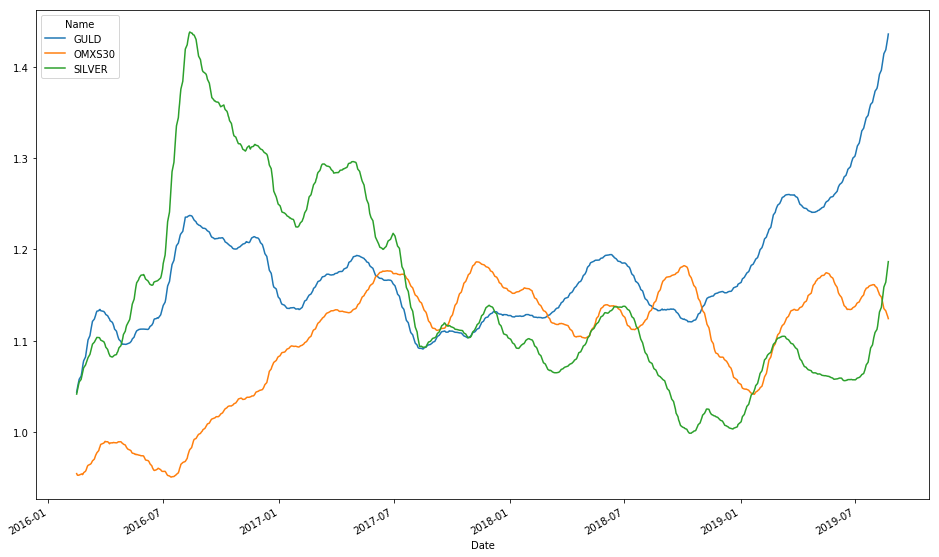

In [53]:
df.div(df.iloc[0]).rolling(30).mean().plot()

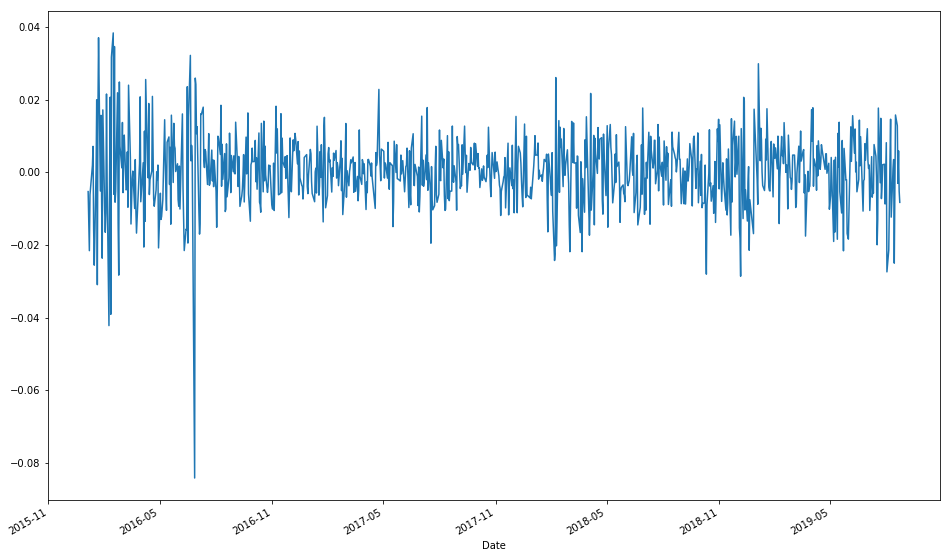

In [148]:
df['OMXS30'].pct_change().plot()

In [292]:
df = pd.read_csv('OMXS30_2019-09-10.csv',sep=';')
print(df.head())
df['Date'] = pd.to_datetime(df['Date'])
df['dayofweek'] = df['Date'].dt.dayofweek
df = df.set_index('Date')
df = df.sort_index()
df['closing_close_yesterday'] = df['Closing price'].shift(1)
df.head()

         Date  Högsta kurs  Lägsta kurs  Closing price  Genomsnittspris  \
0  2019-09-09       200.95       199.98         200.70           200.53   
1  2019-09-06       199.98       199.00         199.62           199.44   
2  2019-09-05       199.48       197.70         199.28           198.41   
3  2019-09-04       197.82       196.68         197.18           197.33   
4  2019-09-03       196.58       195.00         195.66           196.01   

   Tot. vol.          Oms  Unnamed: 7  
0    247 285   49 588 364         NaN  
1    328 710   65 558 298         NaN  
2  1 051 104  208 690 575         NaN  
3  1 559 012  307 635 796         NaN  
4    413 327   81 012 868         NaN  


,Högsta kurs,Lägsta kurs,Closing price,Genomsnittspris,Tot. vol.,Oms,Unnamed: 7,dayofweek,closing_close_yesterday
Date,,,,,,,,,
2016-01-04,152.95,148.20,150.25,150.96,645 857,97 497 230,NaN,0,NaN
2016-01-05,152.00,149.35,149.50,149.90,158 141,23 704 942,NaN,1,150.25
2016-01-07,147.30,143.00,146.05,145.44,2 767 466,402 460 317,NaN,3,149.50
2016-01-08,148.70,145.50,145.50,147.35,497 031,73 234 164,NaN,4,146.05
2016-01-11,146.60,144.85,145.30,145.69,796 716,116 145 978,NaN,0,145.50


In [297]:
col = 'Closing price'
df_trade_omx = df[col].div(df[col].iloc[0]).to_frame()
df_trade_omx['day_change'] = df[col].pct_change().fillna(0)
df_trade_omx['last_action'] = np.nan
df_trade_omx['diff_from_last_action'] = np.nan
df_trade_omx['action'] = np.nan
df_trade_omx['bank_active'] = np.nan
df_trade_omx['bank_inactive'] = np.nan
df_trade_omx['bank_total'] = np.nan
df_trade_omx.head()

,Closing price,day_change,last_action,diff_from_last_action,action,bank_active,bank_inactive,bank_total
Date,,,,,,,,
2016-01-04,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.995008,-0.004992,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,0.972047,-0.023077,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,0.968386,-0.003766,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-11,0.967055,-0.001375,NaN,NaN,NaN,NaN,NaN,NaN


In [301]:
last_act = 1
diff_from_last_action = 0
bank_active = 0.5
bank_inactive = 0.5
transfer = 0.0
threshold = 0.0

for idx, row in df_trade_omx.iterrows():
    #update bank active
    bank_active = bank_active*(1+row['day_change'])
    print(bank_active)
    df_trade_omx.loc[idx, 'bank_active'] = bank_active
    df_trade_omx.loc[idx, 'bank_inactive'] = bank_inactive
    #update change from last action
    df_trade_omx.loc[idx, 'last_action'] = last_act
    diff_from_last_action = row[col] - last_act
    df_trade_omx.loc[idx, 'diff_from_last_action'] = diff_from_last_action
    #check if the change is larger than threshold
    if abs(diff_from_last_action) > threshold:
        last_act = row[col]
        df_trade_omx.loc[idx,'action'] = diff_from_last_action
        if (diff_from_last_action < 0) & (df_trade_omx.loc[idx, 'bank_inactive'] >= transfer):
            bank_active += transfer
            bank_inactive -= transfer
            df_trade_omx.loc[idx, 'bank_active'] = bank_active
            df_trade_omx.loc[idx, 'bank_inactive'] = bank_inactive
        elif df_trade_omx.loc[idx, 'bank_inactive'] >= transfer:
            bank_active -= transfer
            bank_inactive += transfer
            df_trade_omx.loc[idx, 'bank_active'] = bank_active
            df_trade_omx.loc[idx, 'bank_inactive'] = bank_inactive
    else:
        0
        
    #df_trade_omx.loc[df_trade_omx.index > idx, 'bank_active'] = 


        
df_trade_omx['bank_total'] = df_trade_omx['bank_active'] + df_trade_omx['bank_inactive']
    
df_trade_omx.head(10)

0.5
0.49750415973377704
0.48602329450915144
0.4841930116472546
0.48352745424292853
0.48552412645590687
0.4878535773710483
0.4803660565723794
0.4690515806988353
0.4692179700499169
0.4760399334442597
0.46855241264559083
0.4695507487520799
0.4875207986688853
0.4848585690515808
0.49284525790349426
0.4893510815307822
0.47787021630615656
0.48485856905158087
0.4808652246256242
0.4730449251247923
0.46772046589018335
0.477038269550749
0.477038269550749
0.4565723793677207
0.4608985024958406
0.46638935108153107
0.4484193011647257
0.45973377703826984
0.4778702163061567
0.47537437603993377
0.4916805324459238
0.48818635607321165
0.48535773710482566
0.4963394342762067
0.4910149750415977
0.4755407653910153
0.4865224625623963
0.49251247920133145
0.49351081530782065
0.49950083194675565
0.49567387687188047
0.498668885191348
0.5038269550748755
0.5004991680532449
0.49850249584026657
0.501164725457571
0.49750415973377726
0.5081530782029953
0.5111480865224628
0.503993344425957
0.5000000000000003
0.4973377703

0.6159733777038274
0.6252911813643932
0.6232945091514148
0.6181364392678873
0.6251247920133115
0.6207986688851918
0.6164725457570719
0.6148086522462566
0.6078202995008324
0.6103161397670553
0.6134442595673881
0.6206988352745428
0.6222961730449256
0.6262229617304497
0.6314143094841934
0.6299500831946759
0.6319467554076542
0.6293510815307823
0.6294841930116475
0.6282861896838605
0.6276206322795344
0.6277537437603995
0.6296173044925127
0.6320133111480868
0.6353410981697174
0.6311480865224628
0.6202329450915144
0.6240931780366059
0.6230948419301168
0.6198336106489187
0.6158402662229621
0.6195008319467556
0.6133111480865228
0.5982029950083197
0.5850915141430951
0.5988019966722132
0.5887520798668887
0.5797670549084861
0.5886855241264561
0.5855574043261234
0.5921464226289519
0.595740432612313
0.6020632279534112
0.6000000000000003
0.606722129783694
0.6088519134775376
0.6089850249584028
0.610648918469218
0.6140432612312812
0.6145091514143094
0.613710482529118
0.6045257903494174
0.59028286189683

,Closing price,day_change,last_action,diff_from_last_action,action,bank_active,bank_inactive,bank_total
Date,,,,,,,,
2016-01-04,1.000000,0.000000,1.000000,0.000000,NaN,0.500000,0.5,1.000000
2016-01-05,0.995008,-0.004992,1.000000,-0.004992,-0.004992,0.497504,0.5,0.997504
2016-01-07,0.972047,-0.023077,0.995008,-0.022962,-0.022962,0.486023,0.5,0.986023
2016-01-08,0.968386,-0.003766,0.972047,-0.003661,-0.003661,0.484193,0.5,0.984193
2016-01-11,0.967055,-0.001375,0.968386,-0.001331,-0.001331,0.483527,0.5,0.983527
2016-01-12,0.971048,0.004129,0.967055,0.003993,0.003993,0.485524,0.5,0.985524
2016-01-13,0.975707,0.004798,0.971048,0.004659,0.004659,0.487854,0.5,0.987854
2016-01-14,0.960732,-0.015348,0.975707,-0.014975,-0.014975,0.480366,0.5,0.980366
2016-01-15,0.938103,-0.023554,0.960732,-0.022629,-0.022629,0.469052,0.5,0.969052


Buy & Hold: 33.6%, Snitten: 16.8%


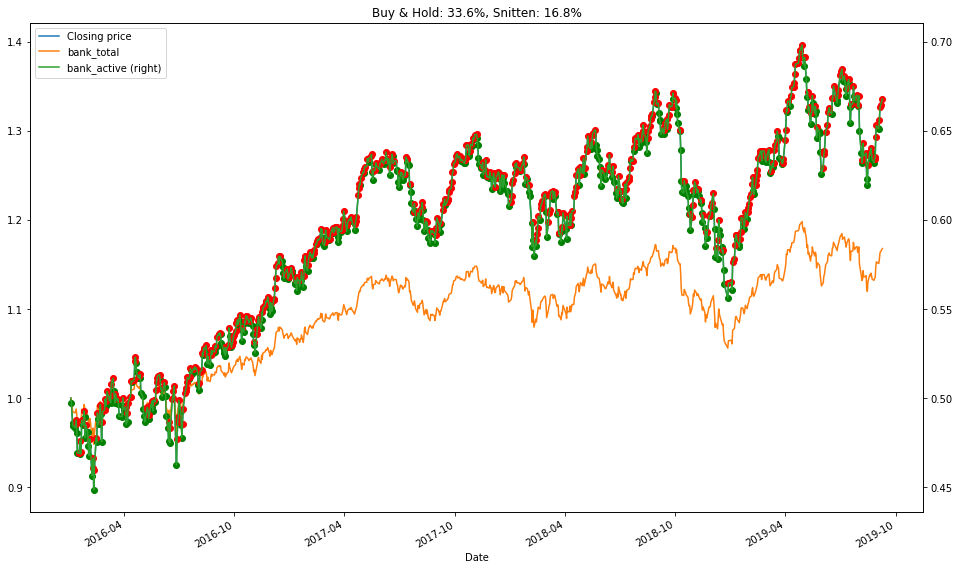

In [302]:
title = df_trade_omx[[col, 'bank_total']].tail(1).values
title = f"Buy & Hold: {str(round((title[0][0]-1)*100, 1))}%, Snitten: {str(round((title[0][1]-1)*100, 1))}%"
print(title)
ax = df_trade_omx[[col, 'bank_total', 'bank_active']].plot(title = title, secondary_y = 'bank_active')
#df_trade_omx.loc[df_trade_omx['action'].dropna().index, 'OMXS30'].plot(ax=ax, ls='', marker='o', color='r')
df_trade_omx.loc[df_trade_omx['action'] < 0, col].plot(ax=ax, ls='', marker='o', color='g')
df_trade_omx.loc[df_trade_omx['action'] > 0, col].plot(ax=ax, ls='', marker='o', color='r')

In [216]:
df_trade_omx['bank_active']

Date
2016-01-04    0.500000
2016-01-05    0.497361
2016-01-07    0.586636
2016-01-08    0.583022
2016-01-11    0.582970
2016-01-12    0.584103
2016-01-13    0.588304
2016-01-14    0.579006
2016-01-15    0.664210
2016-01-18    0.664607
2016-01-19    0.677914
2016-01-20    0.656938
2016-01-21    0.667955
2016-01-22    0.592768
2016-01-25    0.589742
2016-01-26    0.599030
2016-01-27    0.594610
2016-01-28    0.680559
2016-01-29    0.692299
2016-02-01    0.685209
2016-02-02    0.673908
2016-02-03    0.666354
2016-02-04    0.680763
2016-02-05    0.678920
2016-02-08    0.750255
2016-02-09    0.748783
2016-02-10    0.764312
2016-02-11    0.734419
2016-02-12    0.757746
2016-02-15    0.686898
                ...   
2019-07-15   -0.675063
2019-07-16   -0.674095
2019-07-17   -0.660655
2019-07-18   -0.552118
2019-07-19   -0.661922
2019-07-22   -0.660050
2019-07-23   -0.669900
2019-07-24   -0.665072
2019-07-25   -0.662656
2019-07-26   -0.664074
2019-07-29   -0.665584
2019-07-30   -0.659795
2019-0